<a href="https://colab.research.google.com/github/louzeiro/desafios/blob/main/Mutual_CapturaProcessamentoDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Captura dos dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


data_url = 'https://raw.githubusercontent.com/louzeiro/desafios/main/empresas.csv'
data = pd.read_csv(data_url, index_col=0)
data.head()

,estado_empresa,cnae_empresa,capital_empresa,processos_judiciais_empresa,idade_empresa,socios_empresa,fornecedor_empresa
id,,,,,,,
0,SP,3313901,472052,2,16,4,CABL951
1,AM,4221902,605359,3,7,3,CABL951
2,DF,3321000,711994,0,13,2,MEL789
3,AC,4221903,25330,0,5,1,FOO456
4,GO,3321000,271513,0,3,2,MEL789


# Explorando os dados

Resumo de informações sobre os dados
* Nome das colunas
* Total de células nulas
* tipo

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11331 entries, 0 to 11330
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   estado_empresa               11331 non-null  object
 1   cnae_empresa                 11331 non-null  object
 2   capital_empresa              11331 non-null  int64 
 3   processos_judiciais_empresa  11331 non-null  int64 
 4   idade_empresa                11331 non-null  int64 
 5   socios_empresa               11331 non-null  int64 
 6   fornecedor_empresa           11331 non-null  object
dtypes: int64(4), object(3)
memory usage: 708.2+ KB


Verificando a quantidade de linhas duplicadas

In [3]:
print('Total de linhas duplicadas:', data.duplicated().sum())

Total de linhas duplicadas: 0


In [4]:
print('Total de registro nulos nos atributos:', data.isnull().sum())

Total de registro nulos nos atributos: estado_empresa                 0
cnae_empresa                   0
capital_empresa                0
processos_judiciais_empresa    0
idade_empresa                  0
socios_empresa                 0
fornecedor_empresa             0
dtype: int64


## Visão geral das variáveis numéricas



### Estatísticas Básicas

Avaliação prévia dos dados numéricos presentes na base de dados. Onde observa-se que no mínimo as empresas possuem R\$ 10.064,00 e no máximo R\$ 999.963,00 de capital. Além de que, 50% dos registros não apresentam processos judiciais. Em média as empresas tem um pouco mais de 10 anos no mercado.

In [5]:
data.describe()

,capital_empresa,processos_judiciais_empresa,idade_empresa,socios_empresa
count,11331.000000,11331.000000,11331.000000,11331.000000
mean,508196.307916,0.982614,10.981114,2.495896
std,285426.106524,1.416196,6.124697,1.118194
min,10064.000000,0.000000,1.000000,1.000000
25%,262608.500000,0.000000,6.000000,1.000000
50%,510616.000000,0.000000,11.000000,2.000000
75%,756111.000000,2.000000,16.000000,3.000000
max,999963.000000,4.000000,21.000000,4.000000


## Visão geral das variáveis categóricas

Lista de fornecedores

In [10]:
data.fornecedor_empresa.unique()

array(['CABL951', 'MEL789', 'FOO456', 'XPTO123', 'JJF753'], dtype=object)

Estados

In [12]:
data.estado_empresa.unique()

array(['SP', 'AM', 'DF', 'AC', 'GO', 'AP', 'AL', 'RS', 'PB', 'PR', 'PI',
       'MG', 'ES', 'SE', 'MS', 'PE', 'SC', 'CE', 'RR', 'BA', 'MT', 'RJ',
       'PA', 'RN', 'MA', 'RO', 'TO', 'ac', 'al', 'ap', 'am', 'ba', 'ce',
       'df', 'es', 'go', 'ma', 'mt', 'ms', 'mg', 'pa', 'pb', 'pr', 'pe',
       'pi', 'rj', 'rn', 'rs', 'ro', 'sc', 'sp', 'se', 'to', '..',
       'Switzerland'], dtype=object)

Total de ocorrência de cada estado

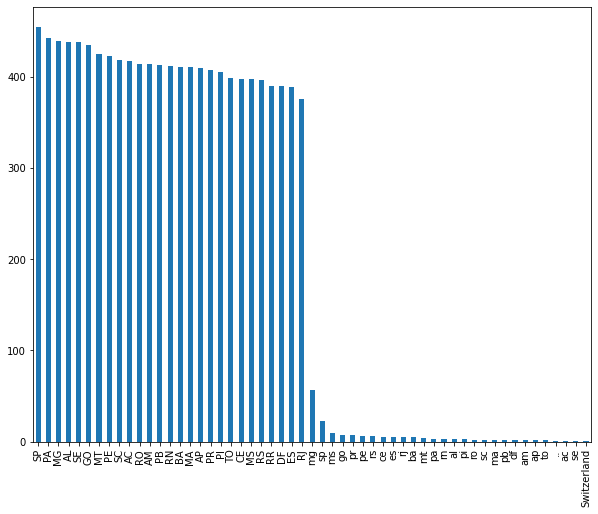

In [13]:
plt.figure(figsize=(10,8))
data.estado_empresa.value_counts().plot.bar()

Corrigindo a inconsistência dos nomes dos estados

In [14]:
data['estado_empresa'] = data['estado_empresa'].str.upper()
data.estado_empresa.unique()

array(['SP', 'AM', 'DF', 'AC', 'GO', 'AP', 'AL', 'RS', 'PB', 'PR', 'PI',
       'MG', 'ES', 'SE', 'MS', 'PE', 'SC', 'CE', 'RR', 'BA', 'MT', 'RJ',
       'PA', 'RN', 'MA', 'RO', 'TO', '..', 'SWITZERLAND'], dtype=object)

Total de ocorrência de cada estado

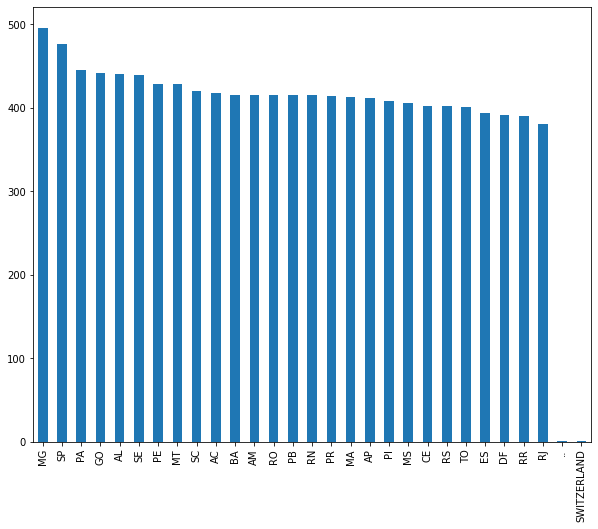

In [15]:
plt.figure(figsize=(10,8))
data.estado_empresa.value_counts().plot.bar()

Avaliando os estados inconsistentes

In [16]:
data.loc[data.estado_empresa=='..']

,estado_empresa,cnae_empresa,capital_empresa,processos_judiciais_empresa,idade_empresa,socios_empresa,fornecedor_empresa
id,,,,,,,
7025,..,...,922416,0,10,2,JJF753


In [17]:
data.loc[data.estado_empresa=='SWITZERLAND']

,estado_empresa,cnae_empresa,capital_empresa,processos_judiciais_empresa,idade_empresa,socios_empresa,fornecedor_empresa
id,,,,,,,
7049,SWITZERLAND,...,577499,0,4,3,CABL951


Removendo os estados inconsistentes

In [18]:
data.drop(data.index[7049], inplace=True)
data.drop(data.index[7025], inplace=True)

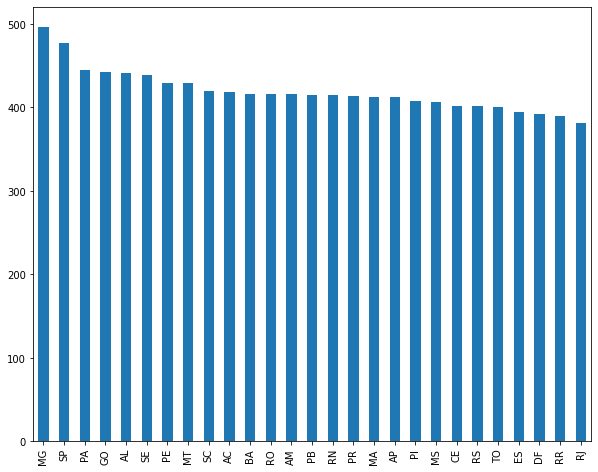

In [19]:
plt.figure(figsize=(10,8))
data.estado_empresa.value_counts().plot.bar()

## Salvando os dados tratados

In [20]:
data.to_csv('empresas_v2.csv', index=False)